### Create Latitude and Longitude Combinations

In [1]:
# Import the dependencies.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use the citipy module to determine city based on latitude and longitude.
    # Under "Looking up with coordinates," the first line says from citipy import citipy, meaning we'll import the citipy script from the citipy module.
    # When a Python file containing a script is imported to use in another Python script, the .py extension does not need to be added to the name of the file when using the import statement.    
from citipy import citipy

# Import the datetime module from the datetime library.
    # If we want to convert the timestamp to the International Organization for Standardization (ISO) format, or YYYY-MM-DD-HH-MM-SS, we need to use the Python datetime module.
from datetime import datetime

# Import the API key.
    # When a Python file containing a script is imported to use in another Python script, the .py extension does not need to be added to the name of the file when using the import statement.
from config import weather_api_key


# Import the time module.
    #  import the time module to get the current date, rather than the datetime module that we used to convert the date.
import time


Since we are creating arrays of latitudes and longitudes, we'll declare each array as a variable. In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

When we run this cell, the output is a zip object in memory. The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes, where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

In [2]:
# Create a set of random latitude and longitude combinations.
    # 1) Create arrays of latitudes and longitudes, we'll declare each array as a variable. 
    # 2) Use Numpty random uniform because its faster to generate the random latitudes and longtitudes.
            # To generate more than one floating-point decimal number between –90 and 90, we can add the size parameter when we use the NumPy module and set that equal to any whole number.
    # 3) Use zip() we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

lats = np.random.uniform(low=-90.00, high=90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs 

Next, let's unpack our lat_lngs zip object into a list. This way, we only need to create a set of random latitudes and longitudes once. 
You can only unzip a zipped tuple once before it is removed from the computer's memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lats_lngs)
coordinates[:3]

[(77.99038187467431, -1.0860447839320102),
 (70.89167760882518, -5.4708137883242784),
 (-69.05251360973878, -156.1733382598208)]

Iterate through our zipped lat_lngs tuple and find the nearest city. When we find a city, we'll need to add it to a list so that we can use the cities to get the weather data.

In [4]:
#1) Create a cities list to store city names.
#2) Using a for loop, iterate through the coordinates' zipped tuple.
#3) Use citipy.nearest_city() and inside the parentheses of nearest_city(), add the latitude and longitude in this format: coordinate[0], coordinate[1].
    # The citipy module finds the nearest city to the latitude and longitude pair with a population of 500 or more.
    #3a) Because of the zip function The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple. Where each latitude and longitude in a tuple can be       accessed by the index of 0 and 1
#4) To print the city name, chain the city_name to the nearest_city() function.
#5) We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. 
    # We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)    

609

In [5]:
#view a part of cities list
cities[:5]

['barentsburg', 'klaksvik', 'mataura', 'ayapel', 'vila velha']

# Get the City Weather Data
Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
    - Group the cities in sets of 50 to log the process as we find the weather data for each city.
3. Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
4. Build the city_url or endpoint for each city.
5. Log the URL and the record and set numbers.
6. Make an API request for each city.
7. Parse the JSON weather data for the following:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

## 1.Import Dependencies, and Initialize an Empty List and Counters

In [6]:
# Import the requests library.
    # To request JSON data over the internet, we use the Requests Library in Python. 
import requests

# Use the citipy module to determine city based on latitude and longitude.
    # Under "Looking up with coordinates," the first line says from citipy import citipy, meaning we'll import the citipy script from the citipy module.
    # When a Python file containing a script is imported to use in another Python script, the .py extension does not need to be added to the name of the file when using the import statement.    
from citipy import citipy

# Import the datetime module from the datetime library.
    # If we want to convert the timestamp to the International Organization for Standardization (ISO) format, or YYYY-MM-DD-HH-MM-SS, we need to use the Python datetime module.
from datetime import datetime

# Import the API key.
    # When a Python file containing a script is imported to use in another Python script, the .py extension does not need to be added to the name of the file when using the import statement.
from config import weather_api_key

At the top of our code block, we are going to declare an empty list, city_data = []; add a print statement that references the beginning of the logging; and create counters for the record numbers, 1–50; and the set counter. n the code block, we have initialized the counters at 1 because we want the first iteration of the logging for each recorded response and the set to start at 1.

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Starting URL for Weather Map API Call.
# Structure example = api.openweathermap.org/data/2.5/weather?q={city name},{state code},{country code}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

## 2-6. Loop Through the List of Cities and Build the City URL
Next, we need to iterate through our list of cities and begin building the URL for each city, while grouping our records in sets of 50. To do this, use for i in range(len(cities)) and the index to tell us when we get to 50. We can also retrieve the city from the cities list and add it to the city_url by using indexing, as shown in the following code:

In [9]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

    # Not Part of the final code block, but for me to see what the cities list looks like after the for loop to spot the error.
    city_error_view = i

In [10]:
# View a part of cities list
city_url
city_error_view

608

Every time we want to reference the city in our code, we need to use the indexing on the cities list. Unfortunately, this will cause programming errors when we are building the city_url because it adds the index, not the city name, to the city_url. To fix this issue, we need to create another for loop to get the city from the cities list.

Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities and retrieve both the index, and the city from the list. The syntax for the enumerate() method is the following:

for i, item in enumerate(list):

Let's use the enumerate() method to get the index of the city for logging purposes and the city for creating an endpoint URL. Add the following code below our counters.

In [11]:
# Create the for loop with the enumerate() method and reference the index and the city in the list.
    # Use the enumerate() method to get the index of the city for logging purposes and the city for creating an endpoint URL as an alternative 
    # way to iterate through the list of cities and retrieve both the index, and the city from the list.
for i, city in enumerate(cities):    
    
    # Group cities in sets of 50 for logging purposes.
        #In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. 
        # If the statement is true, then the set_count and the record_count are incremented by 1.
    if (i % 50 == 0 and i >= 50):
        # % is modulo operation in python for example expression "5 mod 2" would evaluate to 1, because 5 divided by 2 has a quotient of 2 and a remainder of 1, while "9 mod 3" would evaluate to 0,
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
        # Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name 
        # and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
            # Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
        # Add a print statement that tells us the record count and set count, and the city that is being processed.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

### 7. Handle API Request Errors with try-except Blocks

We have handled request errors for getting the response from a valid city with an API call using conditional statements. Now we'll learn how to handle errors while parsing weather data from a JSON file.

We'll add a try-except block to our code to prevent the API request from stopping prematurely if the city_weather request isn't a valid response. If the request isn't valid, the code will not find the first item requested, which is the dictionary "coord" with the code city_lat = city_weather["coord"]["lat"], and skip the city and continue to run.

The try-except block has similar syntax and structure as the if-else statement. The basic format is as follows:

try:
  Do something
except:
  print("An exception occurred")
  
  
We can add a try-except block to our code and, below the tryblock, we will parse the data from the JSON file and add the data to the cities list.

Let's add a try block. Then, below the try block, do the following:
1. Parse the JSON file.
2. Assign variables for each piece of data we need.
3. Add the data to the cities list in a dictionary format.

Add the following code after record_count += 1.

In [13]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Create the for loop with the enumerate() method and reference the index and the city in the list.
    # Use the enumerate() method to get the index of the city for logging purposes and the city for creating an endpoint URL as an alternative 
    # way to iterate through the list of cities and retrieve both the index, and the city from the list.
for i, city in enumerate(cities):    
    
    # Group cities in sets of 50 for logging purposes.
        #In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0 and if the index is greater than or equal to 50. 
        # If the statement is true, then the set_count and the record_count are incremented by 1.
    if (i % 50 == 0 and i >= 50):
        # % is modulo operation in python for example expression "5 mod 2" would evaluate to 1, because 5 divided by 2 has a quotient of 2 and a remainder of 1, while "9 mod 3" would evaluate to 0,
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city.
        # Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are removing the blank spaces in the city name 
        # and concatenating the city name with, city.replace(" ","+"). This will find the corresponding weather data for the city instead of finding the weather data for the first part of the city name.
            # Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
        # Add a print statement that tells us the record count and set count, and the city that is being processed.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON for the current city and retrieve data.
            # If there is no weather data for the city, i.e. , a <Response [404]> then there is no weather to retrieve and City not found. Skipping... is printed.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
            # If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables.
            # We could write a try-except block for each one of these parameters to handle the KeyError if the data wasn't found, but since these parameters are always present in the response this won't be necessary.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
            # We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    # Below the try block and after the except block, we add the closing print statement, which will let us know the data retrieval has been completed. 
    # Make sure that your except block is indented and in line with the try block, and that the print statements are flush with the margin.
    except:
        print("City not found. Skipping...")
        # Add the pass statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue.
        # NOTE: Generally, it isn't good coding practice to add the pass statement to the except block. Ideally, we want to handle or catch each error as it happens and do something specific 
            # (e.g., add another try block or print out the error).
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | ayapel
Processing Record 5 of Set 1 | vila velha
Processing Record 6 of Set 1 | karratha
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | tabou
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | yumen
Processing Record 11 of Set 1 | mahishadal
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | cidreira
Processing Record 15 of Set 1 | borovoy
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | aklavik
Processing Record 18 of Set 1 | sechura
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | narsaq
Processing Record 23 of 

After collecting all our data, we can tally the number of cities in the city_data array of dictionaries using the len() function.

In [15]:
len(city_data)

563

# Create a DataFrame of City Weather Data
Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file. In a new cell, add the following code to convert the array of dictionaries to a Pandas DataFrame and run the cell.

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Klaksvik,62.2266,-6.5890,32.92,68,100,31.83,FO,2021-12-01 18:54:03
1,Mataura,-46.1927,168.8643,56.48,89,8,1.36,NZ,2021-12-01 18:54:04
2,Ayapel,8.3137,-75.1398,86.05,69,42,5.37,CO,2021-12-01 18:54:04
3,Vila Velha,-20.3297,-40.2925,82.35,86,20,6.91,BR,2021-12-01 18:50:49
4,Karratha,-20.7377,116.8463,84.63,30,0,11.10,AU,2021-12-01 18:54:04
5,Upernavik,72.7868,-56.1549,25.00,70,100,11.32,GL,2021-12-01 18:54:05
6,Tabou,4.4230,-7.3528,80.69,79,32,7.09,CI,2021-12-01 18:54:05
7,Thompson,55.7435,-97.8558,1.56,78,90,13.80,CA,2021-12-01 18:54:05
8,Yumen,40.2833,97.2000,22.53,38,0,2.35,CN,2021-12-01 18:54:06
9,Mahishadal,22.1833,87.9833,68.49,53,69,4.97,IN,2021-12-01 18:54:06


Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

new_column_order = ["column2", "column4", "column1"]

Then, we assign a new or the same DataFrame with new column order:

df = df[new_column_order]

In [17]:
list(city_data_df.columns)

['City',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed',
 'Country',
 'Date']

In [18]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.
new_column_order = ['City', 'Country', 'Date', 'Lat','Lng','Max Temp','Humidity','Cloudiness', 'Wind Speed',]

In [20]:
city_data_df = city_data_df[new_column_order]
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Klaksvik,FO,2021-12-01 18:54:03,62.2266,-6.5890,32.92,68,100,31.83
1,Mataura,NZ,2021-12-01 18:54:04,-46.1927,168.8643,56.48,89,8,1.36
2,Ayapel,CO,2021-12-01 18:54:04,8.3137,-75.1398,86.05,69,42,5.37
3,Vila Velha,BR,2021-12-01 18:50:49,-20.3297,-40.2925,82.35,86,20,6.91
4,Karratha,AU,2021-12-01 18:54:04,-20.7377,116.8463,84.63,30,0,11.10
...,...,...,...,...,...,...,...,...,...
558,Chicama,PE,2021-12-01 18:56:52,-7.8447,-79.1469,66.74,61,63,11.07
559,Isabela,PH,2021-12-01 18:56:52,6.7085,121.9711,77.05,86,100,4.72
560,Camopi,GF,2021-12-01 18:56:53,3.1655,-52.3158,76.01,98,100,3.62
561,Bonavista,CA,2021-12-01 18:56:53,48.6499,-53.1147,42.12,68,100,14.29


Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV in a new folder for that file.

In our World_Weather_Analysis folder, create a new folder called "weather_data." Add the following code to a new cell, run the cell, then confirm your CSV file is in the folder.

# Create the output file (CSV).

The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

We've completed our tasks for making API calls, parsing the response, and collecting the data for our project. Before we move on to graphing and statistical analysis, let's update our GitHub repository.

In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plot Latitude vs. Temperature
## Get Data for Plotting

First, we'll retrieve the data we need to create our scatter plots. We will need latitude, maximum temperature, humidity, cloudiness, and wind speed from all the cities. Add the following code to a new cell and run the cell.

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import the time module.
    #  import the time module to get the current date, rather than the datetime module that we used to convert the date.
import time
# Get today's date in seconds.
today = time.time()
today

1638399364.0441458

When we call the time() function with the time module, we get the output of today's time in seconds since January 1, 1970, as a floating-point decimal number.

The format for time appears like the datetime stamp for the JSON weather data. We can convert this using the string format method, strftime() and pass the formatting parameters for our date in parentheses. To get the format for today, we can add %x inside the parentheses.

In the API_practice file, add strftime("%x")to the time module for our today variable and run the cell. The output will be today's date.

In [24]:
today = time.strftime("%x")
today

'12/01/21'

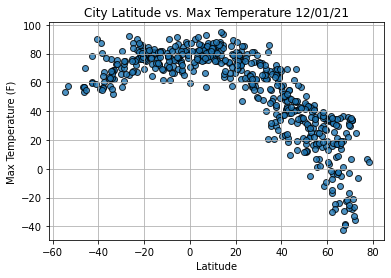

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

## Plot Latitude vs. Humidity

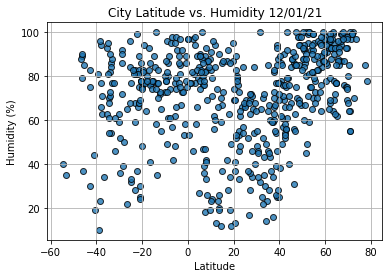

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

## Plot Latitude vs. Cloudiness

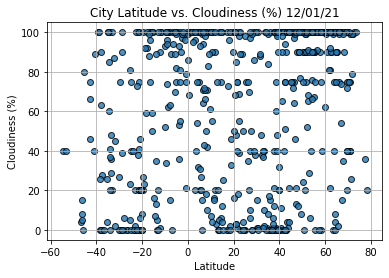

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

## Plot Latitude vs. Wind Speed

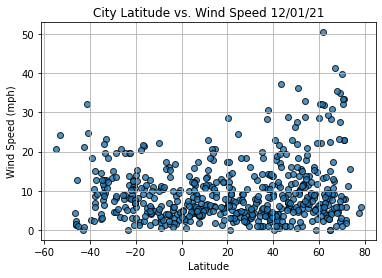

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()